#### Dataset from :- https://www.kaggle.com/niwech/census-income-dataset
#### Task :- Prediction task is to determine whether a person makes over 50K a year.
#### About data :- Imbalanced dataset with high proportion of people from <=50k category.
#### Models used :- Decision Tree classification, svm and then SMOTE with decision tree.
#### Evaluation :- 1) Decision Tree gives an accuracy of 82%, but this is misleading as the data is                                                 imbalanced. It fails to predict people having income >50k. 
####              2) SVM gives 66% accuracy and also fails to predict people having income >50k.
                 
####              3) SMOTE is used which is a technique to do oversampling of data which helps in increasing                           the proportion of minority class.
####              4) Decision Tree is used on SMOTE data which gives an accuracy of 75% but gives high                                 accuracy on people having income >50k.
                 


## Importing data

In [1]:
import pandas as pd


In [2]:
path=r'''C:\Users\Nandit\Desktop\census/train.csv'''
data= pd.read_csv(path, header=None)
path2=r'''C:\Users\Nandit\Desktop\census/test.csv'''
data2= pd.read_csv(path2, header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.shape

(32561, 15)

In [5]:
data2.shape

(16281, 15)

In [6]:
data.rename(columns={ 0:'age', 1:'workclass', 2:'fnlwgt', 3:'education', 4:'education-num', 5:'marital-status', 6:'occupation', 7:'relationship', 8:'race', 9:'sex', 10:'capital-gain', 11:'capital-loss', 12:'hours-per-week', 13:'native-country', 14:'income'}, inplace=True)

In [7]:
data2.rename(columns={ 0:'age', 1:'workclass', 2:'fnlwgt', 3:'education', 4:'education-num', 5:'marital-status', 6:'occupation', 7:'relationship', 8:'race', 9:'sex', 10:'capital-gain', 11:'capital-loss', 12:'hours-per-week', 13:'native-country', 14:'income'}, inplace=True)

In [8]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
data2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## Analysing

In [10]:
data['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [11]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
data.isnull().sum() #no NaN values

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [13]:
data_count=data['income'].value_counts() #many people have income<=50k

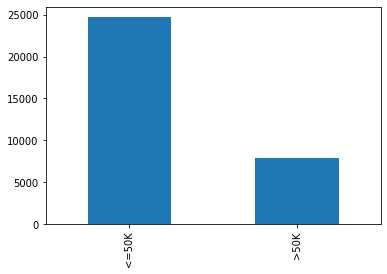

In [101]:
import matplotlib as mpl
import matplotlib.pyplot as plt
data_count.plot(kind='bar')
plt.show()

## Preparing data

In [15]:
labels = data['income'].astype('category').cat.categories.tolist()
replace_map_comp = {'income' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp)

{'income': {'<=50K': 1, '>50K': 2}}


In [16]:
labels = data['workclass'].astype('category').cat.categories.tolist()
replace_map_comp1 = {'workclass' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp1)

{'workclass': {'?': 1, 'Federal-gov': 2, 'Local-gov': 3, 'Never-worked': 4, 'Private': 5, 'Self-emp-inc': 6, 'Self-emp-not-inc': 7, 'State-gov': 8, 'Without-pay': 9}}


In [17]:
labels = data['education'].astype('category').cat.categories.tolist()
replace_map_comp2 = {'education' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp2)

{'education': {'10th': 1, '11th': 2, '12th': 3, '1st-4th': 4, '5th-6th': 5, '7th-8th': 6, '9th': 7, 'Assoc-acdm': 8, 'Assoc-voc': 9, 'Bachelors': 10, 'Doctorate': 11, 'HS-grad': 12, 'Masters': 13, 'Preschool': 14, 'Prof-school': 15, 'Some-college': 16}}


In [18]:
labels = data['marital-status'].astype('category').cat.categories.tolist()
replace_map_comp3 = {'marital-status' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp3)

{'marital-status': {'Divorced': 1, 'Married-AF-spouse': 2, 'Married-civ-spouse': 3, 'Married-spouse-absent': 4, 'Never-married': 5, 'Separated': 6, 'Widowed': 7}}


In [19]:
labels = data['occupation'].astype('category').cat.categories.tolist()
replace_map_comp4 = {'occupation' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp4)

{'occupation': {'?': 1, 'Adm-clerical': 2, 'Armed-Forces': 3, 'Craft-repair': 4, 'Exec-managerial': 5, 'Farming-fishing': 6, 'Handlers-cleaners': 7, 'Machine-op-inspct': 8, 'Other-service': 9, 'Priv-house-serv': 10, 'Prof-specialty': 11, 'Protective-serv': 12, 'Sales': 13, 'Tech-support': 14, 'Transport-moving': 15}}


In [20]:
labels = data['relationship'].astype('category').cat.categories.tolist()
replace_map_comp5 = {'relationship' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp5)

{'relationship': {'Husband': 1, 'Not-in-family': 2, 'Other-relative': 3, 'Own-child': 4, 'Unmarried': 5, 'Wife': 6}}


In [21]:
labels = data['race'].astype('category').cat.categories.tolist()
replace_map_comp6 = {'race' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp6)

{'race': {'Amer-Indian-Eskimo': 1, 'Asian-Pac-Islander': 2, 'Black': 3, 'Other': 4, 'White': 5}}


In [22]:
labels = data['sex'].astype('category').cat.categories.tolist()
replace_map_comp7 = {'sex' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp7)

{'sex': {'Female': 1, 'Male': 2}}


In [23]:
labels = data['native-country'].astype('category').cat.categories.tolist()
replace_map_comp8 = {'native-country' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp8)

{'native-country': {'?': 1, 'Cambodia': 2, 'Canada': 3, 'China': 4, 'Columbia': 5, 'Cuba': 6, 'Dominican-Republic': 7, 'Ecuador': 8, 'El-Salvador': 9, 'England': 10, 'France': 11, 'Germany': 12, 'Greece': 13, 'Guatemala': 14, 'Haiti': 15, 'Holand-Netherlands': 16, 'Honduras': 17, 'Hong': 18, 'Hungary': 19, 'India': 20, 'Iran': 21, 'Ireland': 22, 'Italy': 23, 'Jamaica': 24, 'Japan': 25, 'Laos': 26, 'Mexico': 27, 'Nicaragua': 28, 'Outlying-US(Guam-USVI-etc)': 29, 'Peru': 30, 'Philippines': 31, 'Poland': 32, 'Portugal': 33, 'Puerto-Rico': 34, 'Scotland': 35, 'South': 36, 'Taiwan': 37, 'Thailand': 38, 'Trinadad&Tobago': 39, 'United-States': 40, 'Vietnam': 41, 'Yugoslavia': 42}}


In [24]:
data_no_cat=data.replace(replace_map_comp)
data_no_cat.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1


In [25]:
data_no_cat.replace(replace_map_comp1, inplace=True)
data_no_cat.replace(replace_map_comp2, inplace=True)
data_no_cat.replace(replace_map_comp3, inplace=True)
data_no_cat.replace(replace_map_comp4, inplace=True)
data_no_cat.replace(replace_map_comp5, inplace=True)
data_no_cat.replace(replace_map_comp6, inplace=True)
data_no_cat.replace(replace_map_comp7, inplace=True)
data_no_cat.replace(replace_map_comp8, inplace=True)



In [26]:
data_no_cat.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,8,77516,10,13,5,2,2,5,2,2174,0,40,40,1
1,50,7,83311,10,13,3,5,1,5,2,0,0,13,40,1
2,38,5,215646,12,9,1,7,2,5,2,0,0,40,40,1
3,53,5,234721,2,7,3,7,1,3,2,0,0,40,40,1
4,28,5,338409,10,13,3,11,6,3,1,0,0,40,6,1


In [27]:
# education and education-num are same but different category values so we drop it
data_no_cat.drop('education-num',axis=1,inplace=True)
data_no_cat.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,8,77516,10,5,2,2,5,2,2174,0,40,40,1
1,50,7,83311,10,3,5,1,5,2,0,0,13,40,1
2,38,5,215646,12,1,7,2,5,2,0,0,40,40,1
3,53,5,234721,2,3,7,1,3,2,0,0,40,40,1
4,28,5,338409,10,3,11,6,3,1,0,0,40,6,1


In [28]:
labels = data2['income'].astype('category').cat.categories.tolist()
replace_map_comp = {'income' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp)

{'income': {'<=50K': 1, '>50K': 2}}


In [29]:
labels = data2['workclass'].astype('category').cat.categories.tolist()
replace_map_comp1 = {'workclass' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp1)

{'workclass': {'?': 1, 'Federal-gov': 2, 'Local-gov': 3, 'Never-worked': 4, 'Private': 5, 'Self-emp-inc': 6, 'Self-emp-not-inc': 7, 'State-gov': 8, 'Without-pay': 9}}


In [30]:
labels = data2['education'].astype('category').cat.categories.tolist()
replace_map_comp2 = {'education' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp2)

{'education': {'10th': 1, '11th': 2, '12th': 3, '1st-4th': 4, '5th-6th': 5, '7th-8th': 6, '9th': 7, 'Assoc-acdm': 8, 'Assoc-voc': 9, 'Bachelors': 10, 'Doctorate': 11, 'HS-grad': 12, 'Masters': 13, 'Preschool': 14, 'Prof-school': 15, 'Some-college': 16}}


In [31]:
labels = data2['marital-status'].astype('category').cat.categories.tolist()
replace_map_comp3 = {'marital-status' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp3)

{'marital-status': {'Divorced': 1, 'Married-AF-spouse': 2, 'Married-civ-spouse': 3, 'Married-spouse-absent': 4, 'Never-married': 5, 'Separated': 6, 'Widowed': 7}}


In [32]:
labels = data2['occupation'].astype('category').cat.categories.tolist()
replace_map_comp4 = {'occupation' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp4)

{'occupation': {'?': 1, 'Adm-clerical': 2, 'Armed-Forces': 3, 'Craft-repair': 4, 'Exec-managerial': 5, 'Farming-fishing': 6, 'Handlers-cleaners': 7, 'Machine-op-inspct': 8, 'Other-service': 9, 'Priv-house-serv': 10, 'Prof-specialty': 11, 'Protective-serv': 12, 'Sales': 13, 'Tech-support': 14, 'Transport-moving': 15}}


In [33]:
labels = data2['relationship'].astype('category').cat.categories.tolist()
replace_map_comp5 = {'relationship' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp5)

{'relationship': {'Husband': 1, 'Not-in-family': 2, 'Other-relative': 3, 'Own-child': 4, 'Unmarried': 5, 'Wife': 6}}


In [34]:
labels = data2['race'].astype('category').cat.categories.tolist()
replace_map_comp6 = {'race' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp6)

{'race': {'Amer-Indian-Eskimo': 1, 'Asian-Pac-Islander': 2, 'Black': 3, 'Other': 4, 'White': 5}}


In [35]:
labels = data2['sex'].astype('category').cat.categories.tolist()
replace_map_comp7 = {'sex' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp7)

{'sex': {'Female': 1, 'Male': 2}}


In [36]:
'''labels = data2['native-country'].astype('category').cat.categories.tolist()
replace_map_comp8 = {'native-country' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp8)'''#used this but had 1 less category so copied category from data

replace_map_comp8={'native-country': {'?': 1, 'Cambodia': 2, 'Canada': 3, 'China': 4, 'Columbia': 5, 'Cuba': 6, 'Dominican-Republic': 7, 'Ecuador': 8, 'El-Salvador': 9, 'England': 10, 'France': 11, 'Germany': 12, 'Greece': 13, 'Guatemala': 14, 'Haiti': 15, 'Holand-Netherlands': 16, 'Honduras': 17, 'Hong': 18, 'Hungary': 19, 'India': 20, 'Iran': 21, 'Ireland': 22, 'Italy': 23, 'Jamaica': 24, 'Japan': 25, 'Laos': 26, 'Mexico': 27, 'Nicaragua': 28, 'Outlying-US(Guam-USVI-etc)': 29, 'Peru': 30, 'Philippines': 31, 'Poland': 32, 'Portugal': 33, 'Puerto-Rico': 34, 'Scotland': 35, 'South': 36, 'Taiwan': 37, 'Thailand': 38, 'Trinadad&Tobago': 39, 'United-States': 40, 'Vietnam': 41, 'Yugoslavia': 42}}

In [37]:
data2.replace(replace_map_comp, inplace=True)
data2.replace(replace_map_comp1, inplace=True)
data2.replace(replace_map_comp2, inplace=True)
data2.replace(replace_map_comp3, inplace=True)
data2.replace(replace_map_comp4, inplace=True)
data2.replace(replace_map_comp5, inplace=True)
data2.replace(replace_map_comp6, inplace=True)
data2.replace(replace_map_comp7, inplace=True)
data2.replace(replace_map_comp8, inplace=True)



In [38]:
data2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,5,226802,2,7,5,8,4,3,2,0,0,40,40,1
1,38,5,89814,12,9,3,6,1,5,2,0,0,50,40,1
2,28,3,336951,8,12,3,12,1,5,2,0,0,40,40,2
3,44,5,160323,16,10,3,8,1,3,2,7688,0,40,40,2
4,18,1,103497,16,10,5,1,4,5,1,0,0,30,40,1


In [39]:
data2.drop('education-num',axis=1,inplace=True)
data2.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,5,226802,2,5,8,4,3,2,0,0,40,40,1
1,38,5,89814,12,3,6,1,5,2,0,0,50,40,1
2,28,3,336951,8,3,12,1,5,2,0,0,40,40,2
3,44,5,160323,16,3,8,1,3,2,7688,0,40,40,2
4,18,1,103497,16,5,1,4,5,1,0,0,30,40,1


## Splitting data

In [40]:
df_data = data_no_cat.values
df_data2 = data2.values

In [41]:
X_train = df_data[:,:-1] #all columns except the last one
y_train = df_data[:,len(df_data[0])-1] #only the last column

In [42]:
X_test = df_data2[:,:-1] #all columns except the last one
y_test = df_data2[:,len(df_data2[0])-1]  #only last column

In [43]:
X_train[0:5]

array([[    39,      8,  77516,     10,      5,      2,      2,      5,
             2,   2174,      0,     40,     40],
       [    50,      7,  83311,     10,      3,      5,      1,      5,
             2,      0,      0,     13,     40],
       [    38,      5, 215646,     12,      1,      7,      2,      5,
             2,      0,      0,     40,     40],
       [    53,      5, 234721,      2,      3,      7,      1,      3,
             2,      0,      0,     40,     40],
       [    28,      5, 338409,     10,      3,     11,      6,      3,
             1,      0,      0,     40,      6]], dtype=int64)

In [44]:
y_train[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [45]:
X_test.shape

(16281, 13)

In [46]:
y_test.shape

(16281,)

## Using Decision Trees as our model

In [47]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [48]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree # it shows the default parameters


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [49]:
Tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [50]:
predTree = Tree.predict(X_test)

In [51]:
print (predTree [0:5])
print (y_test [0:5])

[1 1 1 2 1]
[1 1 2 2 1]


## Evaluation

In [52]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.8202198882132548


## 82% accuracy which is very good for a imbalanced dataset like this. But this is misleading as will be shown in evaluation.

## Using SVM as our model

In [53]:
 from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

d:\python\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [54]:
yhat = clf.predict(X_test)
yhat [0:5]

array([1, 1, 1, 1, 1], dtype=int64)

## Evaluation

In [55]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [56]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


              precision    recall  f1-score   support

           1       0.76      1.00      0.87     12435
           2       0.68      0.00      0.01      3846

    accuracy                           0.76     16281
   macro avg       0.72      0.50      0.44     16281
weighted avg       0.74      0.76      0.66     16281

Confusion matrix, without normalization
[[12426     9]
 [ 3827    19]]


<Figure size 72x72 with 0 Axes>

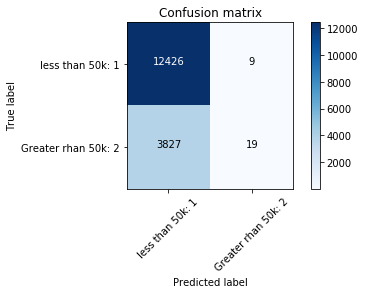

In [57]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure(figsize=(1,1))
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['less than 50k: 1', 'Greater than 50k: 2'],normalize= False,  title='Confusion matrix')

## as we can see in confusion matrix our model fails to predict people having income <50k.

In [58]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.6639632838341913

In [59]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)


d:\python\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.7643879368589153

              precision    recall  f1-score   support

           1       0.81      1.00      0.89     12435
           2       0.96      0.25      0.40      3846

    accuracy                           0.82     16281
   macro avg       0.88      0.62      0.65     16281
weighted avg       0.85      0.82      0.78     16281

Confusion matrix, without normalization
[[12390    45]
 [ 2882   964]]


<Figure size 72x72 with 0 Axes>

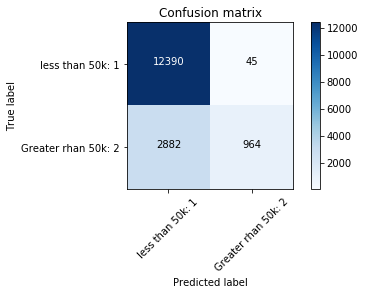

In [62]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predTree, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, predTree))

# Plot non-normalized confusion matrix
plt.figure(figsize=(1,1))
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['less than 50k: 1', 'Greater than 50k: 2'],normalize= False,  title='Confusion matrix')

## same with decision tree model. This is happening because our data is imbalanced.

## We use SMOTE to deal with this. (oversampling)

In [89]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=27, sampling_strategy=0.5) #sampling_strategy is the ratio of binary categories
X_train1, y_train1 = sm.fit_sample(X_train, y_train)

In [90]:
smote = Tree.fit(X_train1, y_train1)

smote_pred = smote.predict(X_test)


              precision    recall  f1-score   support

           1       0.95      0.72      0.82     12435
           2       0.49      0.87      0.63      3846

    accuracy                           0.75     16281
   macro avg       0.72      0.80      0.72     16281
weighted avg       0.84      0.75      0.77     16281

Confusion matrix, without normalization
[[8928 3507]
 [ 483 3363]]


<Figure size 72x72 with 0 Axes>

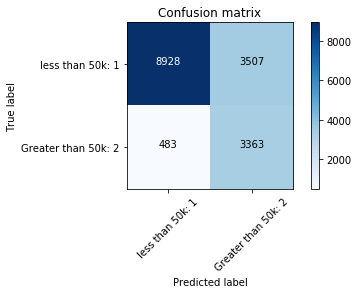

In [95]:
cnf_matrix = confusion_matrix(y_test, smote_pred, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, smote_pred))

# Plot non-normalized confusion matrix
plt.figure(figsize=(1,1))
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['less than 50k: 1', 'Greater than 50k: 2'],normalize= False,  title='Confusion matrix')

## as we can see it performs much better now with a accuracy of 75% but greater accuracy in predicting the people having income >50 from previous models.